# Load Dataset(.csv file)

In [1]:
import pandas as pd
df=pd.read_csv('Cloth-Review.csv',usecols=['Clothing ID','Age','Review_Text','Rating','Division Name','Department Name','Class Name'])
df.head()

,Clothing ID,Age,Review_Text,Rating,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,General,Tops,Blouses


# Pie Chart Of Rating

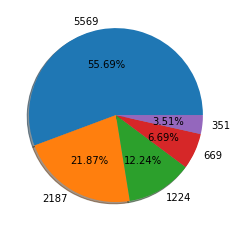

In [2]:
import matplotlib.pyplot as plt
rating=df['Rating'].value_counts()
plt.pie(rating, labels=rating.tolist(),shadow=True,autopct='%.2f%%')
plt.show()

# Convert Review Text To Sentiment Polarity

In [3]:
from textblob import TextBlob
def sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return None

In [4]:
#Now Lets find sentiment without text cleaning
df['Sentiment_NoClean']=df['Review_Text'].apply(sentiment)
df.head()

,Clothing ID,Age,Review_Text,Rating,Division Name,Department Name,Class Name,Sentiment_NoClean
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates,0.633333
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses,0.339583
2,1077,60,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses,0.073675
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants,0.550000
4,847,47,This shirt is very flattering to all due to th...,5,General,Tops,Blouses,0.512891


# Now lets check the pie chart for sentiment without text cleaning

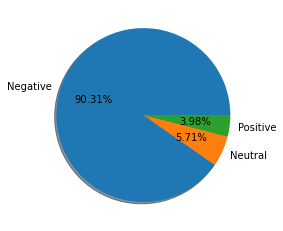

In [5]:
def psn(t):
    if t<0:
        x='Negative'
    elif t==0:
        x='Neutral'
    else:
        x='Positive'
    return x
rating=df['Sentiment_NoClean'].apply(psn)
count=rating.value_counts()
plt.pie(count, labels=['Negative','Neutral','Positive'],shadow=True,autopct='%.2f%%')
plt.show()

# Text Cleaning using stopwords and Regular Expressions

In [6]:
#now lets clean the text by removing stopwords and contractions
import nltk
import json
from nltk.corpus import stopwords

stop=stopwords.words('english')
stop.sort()
stop.pop(25)

with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict

In [7]:
#using regular expression to clean the text.
import re

def stop_words(text):
    text = text.lower()                                             # Lowercases the string
    text = re.sub('@[^\s]+', '', text)                              # Removes usernames
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)   # Remove URLs
    text = re.sub(r"\d+", " ", str(text))                           # Removes all digits
    text = re.sub('&quot;'," ", text)                               # Remove (&quot;) 
    text = re.sub(r"\b[a-zA-Z]\b", "", str(text))                   # Removes all single characters
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])   # Replaces contractions
    for word in text.split():
        if word.lower() in stop:
            text = text.replace(word,"")
    text = re.sub(r"[^\w\s]", " ", str(text))                       # Removes all punctuations
    text = re.sub(r'(.)\1+', r'\1\1', text)                         # Convert more than 2 letter repetitions to 2 letter
    text = re.sub(r"\s+", " ", str(text))                           # Replaces double spaces with single space    
    return text

# Applying Text Cleaning

In [8]:
df.Review_Text=df.Review_Text.astype(str)
df['new_text']=df['Review_Text'].apply(stop_words)
df.head()

,Clothing ID,Age,Review_Text,Rating,Division Name,Department Name,Class Name,Sentiment_NoClean,new_text
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates,0.633333,absolutely wonderful silky sexy comfortable
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses,0.339583,love dress soo pretty happened fd sre glad bc ...
2,1077,60,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses,0.073675,high hopes dress really wanted work me ially ...
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants,0.550000,love love love jumpsuit it fun flirty fabulou...
4,847,47,This shirt is very flattering to all due to th...,5,General,Tops,Blouses,0.512891,shirt flattering due adjustable front tie per...


# Using Sentiment Polarity on Cleaned Text

In [9]:
df['sentiment']=df['new_text'].apply(sentiment)
df.head()

,Clothing ID,Age,Review_Text,Rating,Division Name,Department Name,Class Name,Sentiment_NoClean,new_text,sentiment
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates,0.633333,absolutely wonderful silky sexy comfortable,0.633333
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses,0.339583,love dress soo pretty happened fd sre glad bc ...,0.420000
2,1077,60,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses,0.073675,high hopes dress really wanted work me ially ...,0.030035
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants,0.550000,love love love jumpsuit it fun flirty fabulou...,0.500000
4,847,47,This shirt is very flattering to all due to th...,5,General,Tops,Blouses,0.512891,shirt flattering due adjustable front tie per...,0.458333


# Pie Chart Of Sentiment score of Cleaned Text

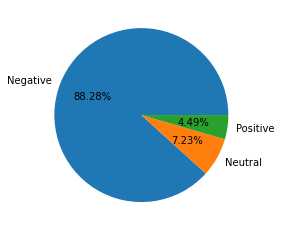

In [10]:
rating_new=df['sentiment'].apply(psn)
count_new=rating_new.value_counts()
plt.pie(count_new, labels=['Negative','Neutral','Positive'],autopct='%.2f%%')
plt.show()

# Sentiment Polarity Before and After Text Cleaning

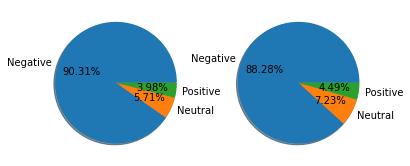

In [11]:
plt.subplot(1,2,1)
plt.pie(count, labels=['Negative','Neutral','Positive'],shadow=True,autopct='%.2f%%')
plt.subplot(1,2,2)
plt.pie(count_new, labels=['Negative','Neutral','Positive'],shadow=True,autopct='%.2f%%')

plt.show()

In [12]:
print('sentiment polarity')
display(pd.DataFrame(count),pd.DataFrame(count_new))

sentiment polarity


,Sentiment_NoClean
Positive,9031
Negative,571
Neutral,398


,sentiment
Positive,8828
Negative,723
Neutral,449


# Multiplication B/W Rating&Sentiment To Get Updated Score

In [13]:
df['updated_score']=df['Rating']*df['sentiment']
df['updated_score_NoClean']=df['Rating']*df['Sentiment_NoClean']
df.head()

,Clothing ID,Age,Review_Text,Rating,Division Name,Department Name,Class Name,Sentiment_NoClean,new_text,sentiment,updated_score,updated_score_NoClean
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates,0.633333,absolutely wonderful silky sexy comfortable,0.633333,2.533333,2.533333
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses,0.339583,love dress soo pretty happened fd sre glad bc ...,0.420000,2.100000,1.697917
2,1077,60,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses,0.073675,high hopes dress really wanted work me ially ...,0.030035,0.090105,0.221025
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants,0.550000,love love love jumpsuit it fun flirty fabulou...,0.500000,2.500000,2.750000
4,847,47,This shirt is very flattering to all due to th...,5,General,Tops,Blouses,0.512891,shirt flattering due adjustable front tie per...,0.458333,2.291667,2.564453


# Function

In [14]:
def newscore(i):
    if i<0:
        v=1
    elif i<2:
        v=2
    elif i<3:
        v=3
    elif i<4:
        v=4
    else:
        v=5
    return v

# Finding New Score by applying function on Updated Score

In [15]:
df['new_score']=df['updated_score'].apply(newscore)
df['new_score']=pd.to_numeric(df['new_score'])
df['new_score_NoClean']=df['updated_score_NoClean'].apply(newscore)
df['new_score_NoClean']=pd.to_numeric(df['new_score_NoClean'])
df.head()

,Clothing ID,Age,Review_Text,Rating,Division Name,Department Name,Class Name,Sentiment_NoClean,new_text,sentiment,updated_score,updated_score_NoClean,new_score,new_score_NoClean
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates,0.633333,absolutely wonderful silky sexy comfortable,0.633333,2.533333,2.533333,3,3
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses,0.339583,love dress soo pretty happened fd sre glad bc ...,0.420000,2.100000,1.697917,3,2
2,1077,60,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses,0.073675,high hopes dress really wanted work me ially ...,0.030035,0.090105,0.221025,2,2
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants,0.550000,love love love jumpsuit it fun flirty fabulou...,0.500000,2.500000,2.750000,3,3
4,847,47,This shirt is very flattering to all due to th...,5,General,Tops,Blouses,0.512891,shirt flattering due adjustable front tie per...,0.458333,2.291667,2.564453,3,3


# Pie Chart of New score of non-cleaned text and cleaned text

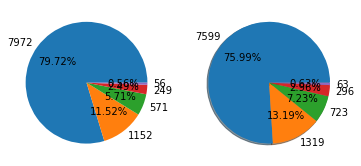

In [16]:
rates_clean=df['new_score'].value_counts()
rates_noclean=df['new_score_NoClean'].value_counts()
plt.subplot(1,2,1)
plt.pie(rates_noclean,labels=rates_noclean.tolist(),autopct='%.2f%%')
plt.subplot(1,2,2)
plt.pie(rates_clean,labels=rates_clean.tolist(),shadow=True,autopct='%.2f%%')
plt.show()

# Bar Chart

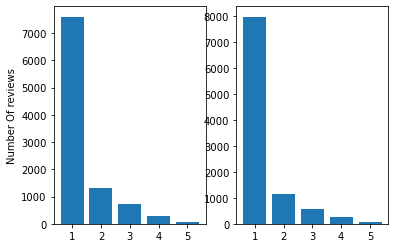

In [17]:
y=['1','2','3','4','5']
plt.subplot(1,2,1)
plt.bar(y,rates_clean)
plt.ylabel('Number Of reviews')
plt.subplot(1,2,2)
plt.bar(y,rates_noclean)
plt.show()

In [18]:
print("Updated score before and after text clean")
display(pd.DataFrame(rates_noclean),pd.DataFrame(rates_clean))

Updated score before and after text clean


,new_score_NoClean
2,7972
3,1152
1,571
4,249
5,56


,new_score
2,7599
3,1319
1,723
4,296
5,63


# comparison of Rating And New Rating

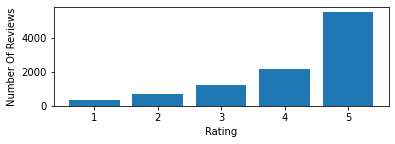

[5569, 2187, 1224, 669, 351]
[5, 4, 3, 2, 1]


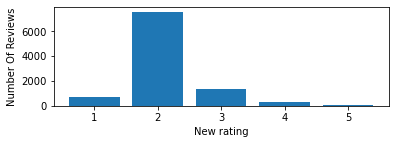

[7599, 1319, 723, 296, 63]
[2, 3, 1, 4, 5]


In [34]:
values=df['Rating'].value_counts().tolist()
labels=df['Rating'].value_counts().keys().tolist()
plt.subplot(2,1,1)
plt.bar(labels,values)
plt.xlabel('Rating')
plt.ylabel('Number Of Reviews')
plt.show()
print(values)
print(labels)
values_new=df['new_score'].value_counts().tolist()
labels_new=df['new_score'].value_counts().keys().tolist()
plt.subplot(2,1,2)
plt.bar(labels_new,values_new)
plt.xlabel('New rating')
plt.ylabel('Number Of Reviews')
plt.show()
print(values_new)
print(labels_new)

# Pivot Table of Clothing ID, Age and new_score

In [20]:
df_pivot=df.pivot_table(index='Clothing ID',columns='Age', values='new_score').fillna(0)
df_pivot

Age,18,19,20,21,22,23,24,25,26,27,...,83,84,85,86,89,90,91,93,94,99
Clothing ID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Sparse Matrix (Compressed Spare Row)

In [21]:
from scipy.sparse import csr_matrix

df_pivot_matrix= csr_matrix(df_pivot.values)
print(df_pivot_matrix)

  (0, 10)	1.0
  (1, 10)	3.0
  (2, 21)	3.0
  (3, 21)	2.0
  (4, 14)	2.0
  (5, 13)	2.0
  (6, 24)	2.0
  (7, 16)	2.0
  (8, 37)	2.0
  (9, 18)	2.0
  (10, 24)	3.0
  (11, 6)	2.0
  (11, 11)	2.0
  (11, 34)	3.0
  (12, 6)	2.0
  (12, 32)	3.0
  (12, 46)	2.0
  (13, 13)	3.0
  (14, 27)	3.0
  (15, 15)	2.0
  (15, 30)	2.0
  (16, 9)	2.0
  (17, 25)	2.0
  (18, 13)	2.0
  (19, 27)	2.0
  :	:
  (603, 26)	2.0
  (604, 16)	2.0
  (604, 17)	2.0
  (605, 15)	2.0
  (605, 20)	2.0
  (605, 24)	2.0
  (606, 20)	2.0
  (606, 27)	1.0
  (607, 11)	3.0
  (608, 37)	2.0
  (608, 42)	2.0
  (608, 50)	2.0
  (609, 13)	2.0
  (610, 17)	2.0
  (610, 20)	2.0
  (611, 10)	3.0
  (611, 12)	2.0
  (611, 13)	2.0
  (611, 14)	2.0
  (611, 26)	2.0
  (611, 27)	2.0
  (611, 30)	2.0
  (611, 37)	2.0
  (611, 47)	3.0
  (612, 21)	2.0


# Fitiing Data Into NearestNeighborsModel

In [22]:
from sklearn.neighbors import NearestNeighbors

model_knn=NearestNeighbors(metric='cosine',n_neighbors=20,radius=1)
model_knn.fit(df_pivot_matrix)

NearestNeighbors(metric='cosine', n_neighbors=20, radius=1)

# Matrix Of Cosine Similarity

In [23]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix=cosine_similarity(df_pivot)
#similarity_matrix=np.round(similarity_matrix,decimals=4)
similarity_matrix

array([[1.        , 1.        , 0.        , ..., 0.        , 0.44232587,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 0.44232587,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.44232587, 0.44232587, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ]])

# User Input For Clothing ID

In [24]:
#Enter product id to check for their nearest neighbor(recommendation)
product_ID=int(input('Enter Clothing ID according to data set:'))
data=list(df_pivot.index)
print(data)

Enter Clothing ID according to data set:245
[2, 4, 5, 13, 14, 17, 18, 20, 21, 30, 34, 35, 38, 47, 50, 52, 54, 56, 57, 59, 61, 63, 68, 70, 71, 72, 77, 80, 83, 88, 89, 96, 102, 105, 107, 113, 114, 115, 116, 117, 118, 121, 122, 124, 126, 127, 129, 132, 133, 134, 135, 137, 138, 144, 146, 149, 150, 151, 153, 154, 155, 158, 160, 162, 164, 170, 173, 176, 177, 178, 179, 183, 189, 191, 197, 201, 203, 204, 205, 206, 207, 211, 212, 216, 219, 225, 230, 232, 234, 235, 238, 243, 245, 246, 247, 248, 251, 252, 255, 257, 260, 261, 265, 270, 272, 273, 279, 282, 283, 285, 288, 292, 294, 295, 299, 302, 305, 306, 308, 312, 313, 318, 319, 321, 323, 324, 327, 329, 330, 334, 336, 337, 338, 340, 341, 346, 348, 352, 359, 360, 363, 365, 366, 368, 371, 373, 374, 379, 380, 381, 384, 385, 392, 396, 397, 398, 399, 404, 405, 406, 407, 409, 410, 411, 412, 413, 414, 418, 422, 424, 427, 429, 431, 433, 434, 435, 439, 442, 448, 458, 460, 462, 463, 464, 465, 468, 472, 475, 478, 481, 485, 486, 491, 494, 495, 496, 502, 505, 

# Finding Index Of Entered Clothing ID

In [25]:
#finding index of our entered product id
query_index=data.index(product_ID)
print(query_index)

92


# finding similarity and index of nearest product

In [26]:
similarity, indices = model_knn.kneighbors(df_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 8)
similarity=np.round(similarity,decimals=4)
print(similarity)
print(indices)

[[0.     0.1425 0.2929 0.2929 0.2929 0.2929 0.2929 0.2929]]
[[ 92  54  18  36 229 503 434 429]]


# Product In Index

In [27]:
product=df_pivot.index[indices.flatten()]
product

Int64Index([245, 146, 57, 114, 609, 1043, 963, 954], dtype='int64', name='Clothing ID')

In [28]:
distance=similarity.flatten()
distance

array([0.    , 0.1425, 0.2929, 0.2929, 0.2929, 0.2929, 0.2929, 0.2929])

# zipping product and index into new list

In [29]:
new=list(zip(product,distance))
pd.DataFrame(new)

,0,1
0,245,0.0000
1,146,0.1425
2,57,0.2929
3,114,0.2929
4,609,0.2929
5,1043,0.2929
6,963,0.2929
7,954,0.2929


In [30]:
rec=pd.DataFrame(new)

print('Entered Product:',product_ID)
rec[1:]

Entered Product: 245


,0,1
1,146,0.1425
2,57,0.2929
3,114,0.2929
4,609,0.2929
5,1043,0.2929
6,963,0.2929
7,954,0.2929


# Appending Division Name, Department Name And Class Name According to Recommendation 

In [31]:
data=[]
for i in product:
    c=df.loc[i,['Division Name','Department Name','Class Name']]
    data.append(c)

In [32]:
data=pd.DataFrame(data)
data

,Division Name,Department Name,Class Name
245,General,Tops,Knits
146,General,Bottoms,Skirts
57,General,Tops,Knits
114,General,Dresses,Dresses
609,General,Dresses,Dresses
1043,General,Tops,Fine gauge
963,General Petite,Bottoms,Jeans
954,General,Dresses,Dresses


# DataFrame With Clothing ID and Distance

In [33]:
data['Distance']=distance
data

,Division Name,Department Name,Class Name,Distance
245,General,Tops,Knits,0.0000
146,General,Bottoms,Skirts,0.1425
57,General,Tops,Knits,0.2929
114,General,Dresses,Dresses,0.2929
609,General,Dresses,Dresses,0.2929
1043,General,Tops,Fine gauge,0.2929
963,General Petite,Bottoms,Jeans,0.2929
954,General,Dresses,Dresses,0.2929
